Copyright **`(c)`** 2023 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# LAB9

Write a local-search algorithm (eg. an EA) able to solve the *Problem* instances 1, 2, 5, and 10 on a 1000-loci genomes, using a minimum number of fitness calls. That's all.

### Deadlines:

* Submission: Sunday, December 3 ([CET](https://www.timeanddate.com/time/zones/cet))
* Reviews: Sunday, December 10 ([CET](https://www.timeanddate.com/time/zones/cet))

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

In [4]:
from random import choices
from random import random, choice, randint, sample, uniform
from copy import copy
from dataclasses import dataclass
import matplotlib.pyplot as plt

import tabulate 

import lab9_lib

ModuleNotFoundError: No module named 'tabulate'

In [ ]:
OFFSPRING_SIZE = 60
POPULATION_SIZE = 30
MUTATION_PROBABILITY = .05
NUM_LOCI = 1000
PROBLEM = [1, 2, 5, 10]


## Individual

- The individual is organized as a class where fitness is the fitness value of the individual and the genotype is a list of 1000 integers (0/1)
- The individual also has a function to perform the mutation and a functon to perform the xover

In [ ]:
@dataclass
class Individual:
    fitness: tuple
    genotype: list[int]

# NOT USED
def tournament_selection(population, tournament_size):
    # Randomly select individuals for the tournament
    tournament = sample(population, tournament_size)
    # Return the individual with the highest fitness
    return max(tournament, key=lambda ind: ind.fitness)


def roulette_wheel_selection(population):
    # Calculate the total fitness of the population
    total_fitness = sum(ind.fitness for ind in population)
    # Select a random value between 0 and the total fitness
    selection_point = uniform(0, total_fitness)
    # Go through the population and sum the fitness from 0, stop when the sum is greater than the selection point
    current_sum = 0
    for ind in population:
        current_sum += ind.fitness
        if current_sum > selection_point:
            return ind


# Given the genome, select randomly a gene and switch is value
def mutate(ind: Individual) -> Individual:
    offspring = copy(ind)
    pos = randint(0, NUM_LOCI - 1)

    if offspring.genotype[pos] == 1:
        offspring.genotype[pos] = 0
    else:
        offspring.genotype[pos] = 1
    offspring.fitness = None
    return offspring


# Give the genome of two individual, create a new offspring by removing a portion of the genome from Ind1 and substituting it with the corresponding portion of Ind2
def one_cut_xover(ind1: Individual, ind2: Individual) -> Individual:
    # Generate two random cut points within the genotype range
    cut_point1, cut_point2 = sorted([randint(0, NUM_LOCI - 1) for _ in range(2)])

    # Ensure cut points are within valid range
    cut_point1 = max(0, cut_point1)
    cut_point2 = min(NUM_LOCI, cut_point2)

    # Perform crossover
    offspring_genotype = (
        ind1.genotype[:cut_point1]
        + ind2.genotype[cut_point1:cut_point2]
        + ind1.genotype[cut_point2:]
    )

    # Create the offspring
    offspring = Individual(fitness=None, genotype=offspring_genotype)

    assert len(offspring.genotype) == NUM_LOCI

    return offspring

## Initial Population

- The initial population of size *POPULATON_SIZE* is created randomly with the same probability to have a 0 or 1 in a locus
- For each individual in the initial population, we evaluate the fitness



In [ ]:
def generate_init_population(fitness):
    weights = [0.5,0.5]
    population = [
        Individual(
            genotype = choices([0,1], weights=weights, k=NUM_LOCI),
            fitness=None,
        )
        for _ in range(POPULATION_SIZE)
    ]

    for i in population:
        i.fitness = fitness(i.genotype) 
    return population

## EA-Algorithm
- Given the initial population, the algorithm select wit a certain probability, to create a given number of offsprings using two different techniques (mutation,xover)
- The population is extended with the offsprings and than it's trimmed, letting survive only the best individuals
- The algorithm is stopped when there are no improvements in the fitness (0.5% of variations in fitness in the last 100 generations) or if the value of the fitenss reachs 1

In [ ]:
def evolutionary_algorithm(fitness, population):
    generation = 0
    fitness_history = []
    while True:
        offspring = []

        for _ in range(OFFSPRING_SIZE):
            if random() < MUTATION_PROBABILITY:
                # mutation
                parent = roulette_wheel_selection(population)
                child = mutate(parent)
            else:
                # xover
                parent1 = roulette_wheel_selection(population)
                parent2 = roulette_wheel_selection(population)
                child = one_cut_xover(parent1, parent2)
            offspring.append(child)

        for ind in offspring:
            ind.fitness = fitness(ind.genotype)

        population.extend(offspring)
        population.sort(key=lambda ind: ind.fitness, reverse=True)

        ind = population[0]

        population = population[:POPULATION_SIZE]

        current_fitness = ind.fitness

        # Append the fitness to the history
        fitness_history.append(current_fitness)

        print(f"Generation {generation}, Best Fitness: {current_fitness:.2%}")

        # Check termination condition
        if generation >= 300:
            recent_fitness_variation = max(fitness_history[-300:]) - min(
                fitness_history[-300:]
            )
            if (
                recent_fitness_variation < 0.005 or current_fitness == 1
            ):  # 0.5% variation or current_fitness is 1
                print(
                    f"Terminating at generation {generation} due to low fitness variation or current_fitness reached 1."
                )
                break

        generation += 1
    return fitness_history

# Problem Results

- In this section the EA algorithm produces results for the different istances of the problem we have, showing results on a plot

Generation 0, Best Fitness: 54.70%
Generation 1, Best Fitness: 54.70%
Generation 2, Best Fitness: 55.30%
Generation 3, Best Fitness: 55.90%
Generation 4, Best Fitness: 56.50%
Generation 5, Best Fitness: 57.00%
Generation 6, Best Fitness: 57.90%
Generation 7, Best Fitness: 58.70%
Generation 8, Best Fitness: 58.90%
Generation 9, Best Fitness: 58.90%
Generation 10, Best Fitness: 59.30%
Generation 11, Best Fitness: 60.00%
Generation 12, Best Fitness: 60.00%
Generation 13, Best Fitness: 60.40%
Generation 14, Best Fitness: 61.00%
Generation 15, Best Fitness: 61.40%
Generation 16, Best Fitness: 61.80%
Generation 17, Best Fitness: 62.10%
Generation 18, Best Fitness: 62.50%
Generation 19, Best Fitness: 62.70%
Generation 20, Best Fitness: 62.90%
Generation 21, Best Fitness: 62.90%
Generation 22, Best Fitness: 63.40%
Generation 23, Best Fitness: 63.40%
Generation 24, Best Fitness: 63.60%
Generation 25, Best Fitness: 63.60%
Generation 26, Best Fitness: 63.80%
Generation 27, Best Fitness: 64.00%
Ge

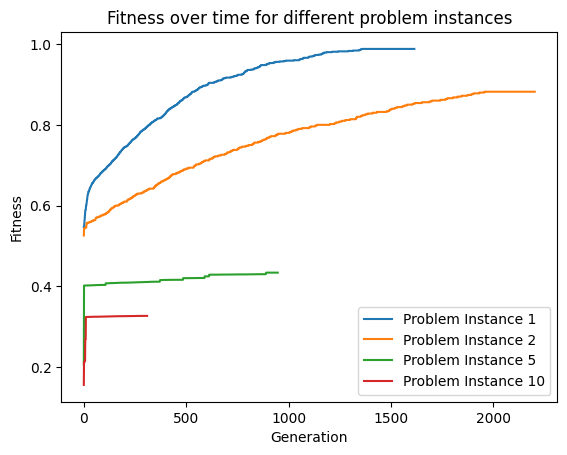

NameError: name 'tabulate' is not defined

In [ ]:
problem_instances = PROBLEM
fitness_histories = []
call_history = []

for instance in problem_instances:
    # Initialize your problem here with the current instance
    fitness = lab9_lib.make_problem(instance)

    init_population = generate_init_population(fitness)

    fitness_history = evolutionary_algorithm(fitness, init_population)

    # Append the fitness history of this run to the fitness_histories list
    fitness_histories.append(fitness_history)
    
    call_history.append(fitness.calls)

# Plot the results
for i, fitness_history in enumerate(fitness_histories):
    plt.plot(fitness_history, label=f"Problem Instance {problem_instances[i]}")

plt.title("Fitness over time for different problem instances")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.show()


table_data = []
for i, instance in enumerate(problem_instances):
    table_data.append([f"Problem Instance {instance}", fitness_histories[i][-1], call_history[i]])

table_headers = ["Problem Instance", "Final Fitness", "Fitness Calls"]
table = tabulate.tabulate(table_data, headers=table_headers, tablefmt="pretty")

print(table)